# Naive Bayes On Amazon Fine Food Reviews

## ***Objective***

    1.Applying Naive Bayes using BernoulliNB and Multinomial NB on different featurization of data viz. 
    a)BOW
    b)Tfidf 

    2.Evaluated the test data on various performance metrics like-
    a)accuracy
    b)precision
    c)recall
    d)f1 score 
    
    3.Plotted confusion matrics using seaborne.

    4.Print top 10 important features for both negative and positive reviews.
  

## Imports, Exploratory Data Analysis & Pre processing

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from time import time
import random
import gensim
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
#from sklearn import cross_validation
# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [89]:
# Load the Drive helper and mount
#from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#loading from drive
#filtered_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Reviews.csv')
filtered_data=pd.read_csv('Reviews.csv')#displaying
filtered_data.head()

print(filtered_data.shape) #looking at the number of attributes and size of the data
filtered_data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
#For setting positive/negative 
#filtered_data=pd.read_csv('Reviews.csv')
def partition(x):
    if x < 3:
        return 0
    return 1
#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
#pdb.set_trace()
positiveNegative = actualScore.map(partition) 
#pdb.set_trace()
filtered_data['Score'] = positiveNegative
#print(filtered_data.head())#print 5 row 
print(filtered_data.shape) #looking at the number of attributes and size of the data
filtered_data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True,)

In [5]:
sorted_data=sorted_data[sorted_data.HelpfulnessNumerator<=sorted_data.HelpfulnessDenominator]
print(sorted_data.shape)

(568452, 10)


In [6]:
#De-duplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)

print(final.shape)#shape

print((final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100)#percentage

#get to know how much posive negative there in table
final['Score'].value_counts()

(393931, 10)
69.29865917031105


1    336824
0     57107
Name: Score, dtype: int64

In [7]:
###Sorting as we want according to time series

n_samples = 100000
df_sample = final.sample(n_samples)

df_sample.sort_values('Time',inplace=True)
df_sample.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
374358,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."
374399,374400,B00004CI84,A2DEE7F9XKP3ZR,jerome,0,3,1,959990400,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...
131216,131217,B00004RAMX,A5NQLNC6QPGSI,Kim Nason,7,8,1,965001600,End your Gopher Problems,I have just recently purchased the Woodstream ...
374420,374421,B00004CI84,A1FJOY14X3MUHE,Justin Howard,2,2,1,966297600,"A fresh, original film from master storyteller...","This is such a great film, I don't even know h..."
374382,374383,B00004CI84,A34NBH479RB0E,"""dmab6395""",0,1,1,977184000,FUNNY,"I THOUGHT THIS MOVIE WAS SO FUNNY, MICHAEL KEA..."


In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')#choosen the english language

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer,SnowballStemmer

stop = set(stopwords.words('english')) #set of stopwords
porter = PorterStemmer()
snowball = SnowballStemmer('english')
#Text Preprocessing: Stemming, stop-word removal and Lemmatization
# find sentences containing HTML tags
import re#regular expression

i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;



[nltk_data] Downloading package stopwords to C:\Users\Ravi
[nltk_data]     Krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0
In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.


In [9]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''

final_100000 = df_sample.head(100000)#taking 100000 datapoints

def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

    str1=[];

for sent in final_100000['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    sent=cleanpunc(sent) 
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(snowball.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final_100000['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final_100000['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    #str1 =b" ".join(filtered_sentence) #final string of cleaned words
    str1 =b' '.join(filtered_sentence).decode()
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [10]:
#adding a column of CleanedText which displays the data after pre-processing of the review 
final_100000['clean_text']=final_string
print(final_100000.shape)

(100000, 11)


In [26]:
def plot_graph(gsv): #graph function

    x=[]
    y=[]
    for a in gsv.grid_scores_:
        x.append(a[0]['alpha']) 
        y.append(a[1])

    plt.xlim(-10,1000)
    plt.ylim(0.8,0.9)
    plt.xlabel(r"$\alpha$",fontsize=15)
    plt.ylabel("accuracy")
    plt.title(r'Accuracy v/s $\alpha$')
    plt.plot(x,y)
    plt.show()
    

In [12]:
#feature importance method 1
def show_most_informative_features(vectorizer, clf, n=100):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
#Code Reference:https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers


In [15]:
#feature importance method 2
#Code Reference:https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers
def important_features(vectorizer,classifier,n=10):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]
    print("Important words in negative reviews")
    print("ClassLabel\tFeatureCount\tFeatureName")
    for coef, feat in topn_class1:
        print("\t",class_labels[0],"\t", coef,"\t", feat) 
    print("-----------------------------------------")
    print("Important words in positive reviews")
    print("ClassLabel\tFeatureCount\tFeatureName")
    for coef, feat in topn_class2:
        print("\t",class_labels[1],"\t", coef,"\t", feat)  


In [16]:
#feature importance method 3
#finding the top n negative/positive class words
def FEATURE_IMPORTANCE(vect,clf,n,pos_neg,text):

    f_imp=clf.feature_log_prob_[pos_neg].argsort()[-n:]
    sort=np.sort(clf.feature_log_prob_[pos_neg])[-n:]
    print('top 10 frequent words occur in', text ,' class and their log_prob--')
    for i in range(n):
        print(np.take(vect.get_feature_names(),f_imp[i])," : ",sort[i])

## Apply Naive Bayes on BOW

### Applying Naive Bayes

In [17]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(final_100000['clean_text'].values,
                                                    final_100000['Score'].values ,test_size=0.30,shuffle=False)

In [18]:
#Text -> Uni gram Vectors

uni_gram = CountVectorizer()
X_train = uni_gram.fit_transform(X_train)

#Normalize Data

X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = uni_gram.transform(X_test)

#Normalize Data

X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (70000, 32047)
Test Data Size:  (30000, 32047)


In [19]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)
for train, cv in tscv.split(X_train):

    # print("%s %s" % (train, cv))
    print(X_train[train].shape, X_train[cv].shape)

(6370, 32047) (6363, 32047)
(12733, 32047) (6363, 32047)
(19096, 32047) (6363, 32047)
(25459, 32047) (6363, 32047)
(31822, 32047) (6363, 32047)
(38185, 32047) (6363, 32047)
(44548, 32047) (6363, 32047)
(50911, 32047) (6363, 32047)
(57274, 32047) (6363, 32047)
(63637, 32047) (6363, 32047)


In [20]:
%%time
from sklearn.model_selection import GridSearchCV # Finding the best "Alpha" using forward chaining cross validation
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
param_grid ={'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier

tscv = TimeSeriesSplit(n_splits=10) #For time based splitting

grid = GridSearchCV(bnb, param_grid, cv=10, scoring='accuracy', return_train_score=False)# instantiate the grid
grid.fit(X_train,y_train)

print("Best HyperParameter: ",grid.best_params_)
print("Best Accuracy: %.2f%%"%(grid.best_score_*100))


Best HyperParameter:  {'alpha': 0.005}
Best Accuracy: 88.32%
Wall time: 23.3 s


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


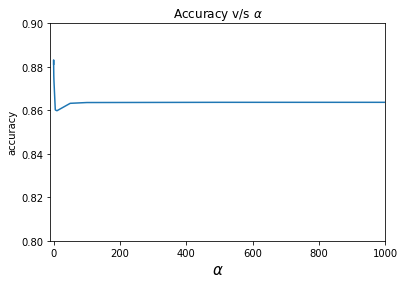

In [27]:
plot_graph(grid)

Accuracy on test set: 87.233%
Precision_score on test set: 91.530%
Recall_score on test set: 93.402%
F1_score on test set: 92.456%
Confusion Matrix of test set:
 [ [TN  FN]
   [FP  TP] ]

Wall time: 833 ms


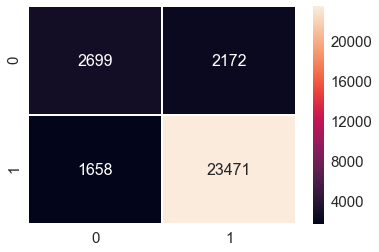

In [28]:
%%time
# Testing Accuracy on Test data
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB(alpha=0.005)
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))

print("Confusion Matrix of test set:\n [ [TN  FN]\n   [FP  TP] ]\n")

df_cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5) #for label size                     
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)

#### Feature Importance on Navie Bays (BOW)

In [29]:
#Feature Importance (1st way via coef)

important_features(uni_gram,bnb)


Important words in negative reviews
ClassLabel	FeatureCount	FeatureName
	 0 	 3524.0 	 tast
	 0 	 3494.0 	 like
	 0 	 2844.0 	 product
	 0 	 2480.0 	 one
	 0 	 2313.0 	 would
	 0 	 2192.0 	 tri
	 0 	 2042.0 	 flavor
	 0 	 2029.0 	 good
	 0 	 1904.0 	 buy
	 0 	 1805.0 	 get
-----------------------------------------
Important words in positive reviews
ClassLabel	FeatureCount	FeatureName
	 1 	 18800.0 	 like
	 1 	 18640.0 	 tast
	 1 	 17079.0 	 good
	 1 	 16311.0 	 love
	 1 	 15886.0 	 great
	 1 	 14848.0 	 flavor
	 1 	 14113.0 	 one
	 1 	 13794.0 	 use
	 1 	 13178.0 	 tri
	 1 	 12900.0 	 product


### Applying Multinomial Naive Bayes

In [30]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,
0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(mnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best HyperParameter:  {'alpha': 0.005}
Best Accuracy: 87.25%
Wall time: 11 s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   10.8s finished


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


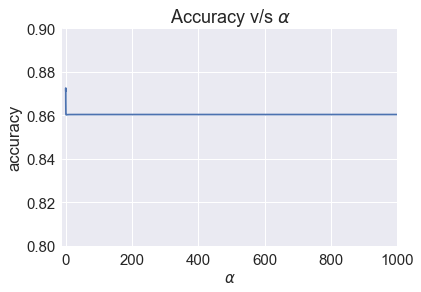

In [31]:
#graph plot
plot_graph(gsv)

Accuracy on test set: 85.693%
Precision_score on test set: 85.610%
Recall_score on test set: 99.674%
F1_score on test set: 92.108%


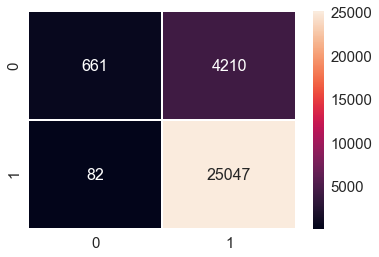

In [32]:
#Testing Accuracy on Test data
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB(alpha=0.005)
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.5) #for label size                     
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)

#### Feature Importance Multinomial Navie Bays (BOW)

In [33]:
#feature importance for multinomial NAVIE BAYS (2nd way via feature_log_prob_ )

FEATURE_IMPORTANCE(uni_gram,mnb,10,0,'Negative')    

top 10 frequent words occur in Negative  class and their log_prob--
order  :  -5.052063826886038
buy  :  -4.987062909208701
good  :  -4.931387953977494
tri  :  -4.850977367792831
would  :  -4.806831029673249
flavor  :  -4.710710340130262
one  :  -4.70056778805703
product  :  -4.380603039502449
like  :  -4.214928076180537
tast  :  -4.100750524865709


In [34]:
FEATURE_IMPORTANCE(uni_gram,mnb,10,1,'Positive')

top 10 frequent words occur in Positive  class and their log_prob--
tri  :  -4.889992809477012
one  :  -4.7901834191315205
use  :  -4.717901887857476
product  :  -4.715548094881443
flavor  :  -4.579540271385783
great  :  -4.503361035008613
love  :  -4.4905404463636085
good  :  -4.4889086964151375
like  :  -4.401561463585979
tast  :  -4.386967544757313


## Apply Naive Bayes on TF-IDF

### Applying Naive Bayes

In [35]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Breaking into Train and test
X_train, X_test, y_train1, y_test = train_test_split(final_100000['clean_text'].values,final_100000['Score'].values ,test_size=0.30,shuffle=False)

tfidf = TfidfVectorizer(ngram_range=(1,2)) #Using bi-grams
X_train_tfidf=tfidf.fit_transform(X_train)

#Normalize Data
X_traintfidf_counts = preprocessing.normalize(X_train_tfidf)
print("Train Data Size: ",X_traintfidf_counts.shape)
X_test = tfidf.transform(X_test)
#Normalize Data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (70000, 993349)
Test Data Size:  (30000, 993349)
Wall time: 26.1 s


In [36]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
param_grid = {'alpha':[1000,500,100,50,10,7,6,5,4,2,1,0.5,0.1,0.05,0.01,0.005,0.001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(bnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_traintfidf_counts,y_train)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:  1.9min finished


Best HyperParameter:  {'alpha': 0.001}
Best Accuracy: 86.37%
Wall time: 1min 55s


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


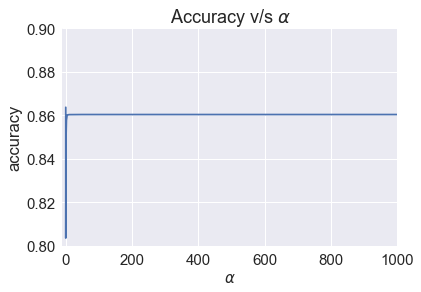

In [37]:
#graph 
plot_graph(gsv)

Accuracy on test set: 86.593%
Precision_score on test set: 86.894%
Recall_score on test set: 98.914%
F1_score on test set: 92.515%
Wall time: 588 ms


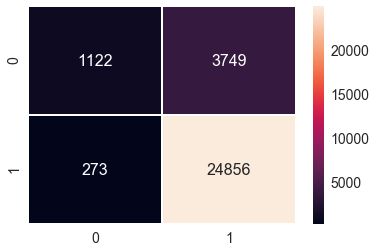

In [38]:
%%time
#Testing Accuracy on Test data
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB(alpha=0.001)
bnb.fit(X_traintfidf_counts,y_train)
y_pred = bnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4) #for label size                     
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)

#### Feature Importance on Multinomial Navie Bays (TFIDF)

In [39]:
#Feature Importance (1st way via coef)

important_features(tfidf,bnb)


Important words in negative reviews
ClassLabel	FeatureCount	FeatureName
	 0 	 3524.0 	 tast
	 0 	 3494.0 	 like
	 0 	 2844.0 	 product
	 0 	 2480.0 	 one
	 0 	 2313.0 	 would
	 0 	 2192.0 	 tri
	 0 	 2042.0 	 flavor
	 0 	 2029.0 	 good
	 0 	 1904.0 	 buy
	 0 	 1805.0 	 get
-----------------------------------------
Important words in positive reviews
ClassLabel	FeatureCount	FeatureName
	 1 	 18800.0 	 like
	 1 	 18640.0 	 tast
	 1 	 17079.0 	 good
	 1 	 16311.0 	 love
	 1 	 15886.0 	 great
	 1 	 14848.0 	 flavor
	 1 	 14113.0 	 one
	 1 	 13794.0 	 use
	 1 	 13178.0 	 tri
	 1 	 12900.0 	 product


### Applying Multinomial Naive Bayes

In [40]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
param_grid = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(mnb,param_grid,cv=tscv,verbose=1)
gsv.fit(X_traintfidf_counts,y_train)

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best HyperParameter:  {'alpha': 0.05}
Best Accuracy: 87.39%
Wall time: 1min 10s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.2min finished


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


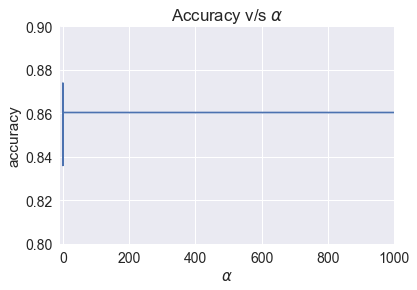

In [41]:
plot_graph(gsv)

Accuracy on test set: 86.080%
Precision_score on test set: 85.936%
Recall_score on test set: 99.698%
F1_score on test set: 92.307%
Wall time: 414 ms


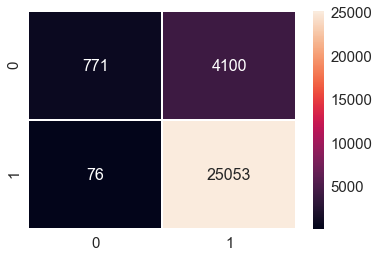

In [42]:
%%time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB(alpha=0.05)
mnb.fit(X_traintfidf_counts,y_train)
y_pred = mnb.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.5) #for label size                     
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)

#### Feature Importance Multinomial Navie Bays (TFIDF)

In [43]:
#feature importance for multinomial NAVIE BAYS (2nd way via feature_log_prob_ )
    
FEATURE_IMPORTANCE(tfidf,mnb,10,0,'Negative')    

top 10 frequent words occur in Negative  class and their log_prob--
buy  :  -7.13303741208571
order  :  -7.122179975034094
tri  :  -7.105285115422609
coffe  :  -7.008751193894622
one  :  -6.995642266321445
flavor  :  -6.990498625293218
would  :  -6.96177691984872
product  :  -6.661102198624924
like  :  -6.614889875566531
tast  :  -6.497949927448511


In [44]:
FEATURE_IMPORTANCE(tfidf,mnb,10,1,'Positive')

top 10 frequent words occur in Positive  class and their log_prob--
product  :  -6.540002160040899
use  :  -6.537616839812984
coffe  :  -6.462140732327311
flavor  :  -6.4115656297153825
good  :  -6.385322322074521
tea  :  -6.383431450313046
love  :  -6.358900008811538
like  :  -6.354350615110316
great  :  -6.34936978354717
tast  :  -6.338725457960151


## ***Conclusion:***

|Featurization |Accuracy Score |Precision Score |Re-call Score| F1-Score |
| ---------------------|--------------------------|--------------------------|---------------------|----------------| 
| BOW (BernoulliNB) |    87.233%     |     91.530%    |93.402%     |     92.456%     |
| BOW (MultinomialNB)|     85.693%     |     85.610%    |99.674%     |    92.108%     |
| ******************|************|****************|****|****|
| TFIDF (BernoulliNB) |   86.593%     |     86.894%    |98.914%     |     92.515%     |
| TFIDF (MultinomialNB)|    86.080%     |     85.936%    |99.698%     |     92.907%     |

                                            ---XXX---